## Implementação de um Classificador Perceptron e Multilayer Perceptron

In [ ]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Testando o classificador Perceptron

In [ ]:
"""Dados de Treinamento """
X = np.array([[1,1],[2,2],[3,3]])
y = np.array([1,1,-1])

"""Criando objeto Perceptron"""
ppn = Perceptron(eta=0.1, n_iter=100)

"""Treinando o modelo"""
ppn.fit(X, y)

"""Testando modelo treinado """
X_newdata = np.array([[4,4],[2,2],[3,3]])
print("Resultado da Predição",ppn.predict(X_newdata));

Resultado da Predição [-1  1 -1]


## Questao 1 - Implementar o modelo Multilayer Perceptron (MLP) e testar este classificador

In [ ]:
import numpy as np

class MLPClassifier:
    def __init__(self, hidden_units=10, learning_rate=0.1, n_epochs=100):
        self.hidden_units = hidden_units
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Inicialização dos pesos
        self.W1 = np.random.randn(n_features, self.hidden_units)
        self.b1 = np.zeros((1, self.hidden_units))
        self.W2 = np.random.randn(self.hidden_units, n_classes)
        self.b2 = np.zeros((1, n_classes))

        for _ in range(self.n_epochs):
            # Forward pass
            z1 = np.dot(X, self.W1) + self.b1
            a1 = self.sigmoid(z1)
            z2 = np.dot(a1, self.W2) + self.b2
            a2 = self.softmax(z2)

            # Backward pass
            delta2 = a2 - self.one_hot_encode(y, n_classes)
            dW2 = np.dot(a1.T, delta2)
            db2 = np.sum(delta2, axis=0)
            delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(z1)
            dW1 = np.dot(X.T, delta1)
            db1 = np.sum(delta1, axis=0)

            # Atualização dos pesos
            self.W2 -= self.learning_rate * dW2
            self.b2 -= self.learning_rate * db2
            self.W1 -= self.learning_rate * dW1
            self.b1 -= self.learning_rate * db1

    def predict(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = self.sigmoid(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.softmax(z2)
        return np.argmax(a2, axis=1)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def one_hot_encode(self, y, n_classes):
        one_hot = np.zeros((len(y), n_classes))
        one_hot[np.arange(len(y)), y] = 1
        return one_hot



In [ ]:

# Dados de Treinamento
X = np.array([[1, 1], [2, 2], [3, 3]])
y = np.array([1, 1, -1])

# Criando objeto MLPClassifier
mlp = MLPClassifier(hidden_units=4, learning_rate=0.1, n_epochs=1000)

# Treinando o modelo
mlp.fit(X, y)

# Testando modelo treinado
X_newdata = np.array([[4, 4], [2, 2], [3, 3]])
predictions = mlp.predict(X_newdata)
print("Resultado da Predição:", predictions)

Resultado da Predição: [1 1 1]


## Questao 2a - Implemente uma função para calcular a acurácia dos modelos

In [ ]:
def calcular_acuracia(y_true, y_pred):
    """
    Calcula a acurácia do modelo.

    Parâmetros:
    - y_true: numpy array contendo as classes verdadeiras.
    - y_pred: numpy array contendo as classes previstas.

    Retorna:
    - acuracia: float representando a acurácia do modelo.
    """
    acuracia = np.mean(y_true == y_pred)
    return acuracia

In [ ]:
# Dados de Treinamento
X = np.array([[1, 1], [2, 2], [3, 3]])
y = np.array([1, 1, -1])

# Criando objeto MLPClassifier
mlp = MLPClassifier(hidden_units=4, learning_rate=0.1, n_epochs=1000)

# Treinando o modelo
mlp.fit(X, y)

# Testando modelo treinado
X_newdata = np.array([[4, 4], [2, 2], [3, 3]])
predictions = mlp.predict(X_newdata)

# Calculando a acurácia
acuracia = calcular_acuracia(y, predictions)
print("Acurácia:", acuracia)

Acurácia: 0.6666666666666666


In [ ]:
"""Dados de Treinamento """
X = np.array([[1,1],[2,2],[3,3]])
y = np.array([1,1,-1])

"""Criando objeto Perceptron"""
ppn = Perceptron(eta=0.1, n_iter=100)

"""Treinando o modelo"""
ppn.fit(X, y)

"""Testando modelo treinado """
X_newdata = np.array([[4,4],[2,2],[3,3]])
predictions = ppn.predict(X_newdata)
acuracia = calcular_acuracia(y, predictions)
print("Acurácia:", acuracia)

Acurácia: 0.6666666666666666


## Questao 2b - Implemente um método de validação cruzada para testar

In [ ]:
from sklearn.datasets import make_classification

def cross_validation(X, y, model, k=5):
    """
    Executa a validação cruzada para avaliar o desempenho do modelo.

    Parâmetros:
    - X: numpy array contendo os dados de entrada.
    - y: numpy array contendo as classes alvo.
    - model: objeto do tipo MLPClassifier ou outro modelo.
    - k: número de folds para a validação cruzada (padrão: 5).

    Retorna:
    - scores: numpy array contendo as métricas de desempenho para cada fold.
    """

    n_samples = len(X)
    fold_size = n_samples // k
    scores = []

    for i in range(k):
        # Dividir os dados em conjunto de treinamento e teste
        start = i * fold_size
        end = (i + 1) * fold_size

        X_test = X[start:end]
        y_test = y[start:end]

        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)

        # Treinar o modelo
        model.fit(X_train, y_train)

        # Testar o modelo
        y_pred = model.predict(X_test)

        # Calcular a acurácia
        accuracy = np.mean(y_test == y_pred)

        # Armazenar a acurácia na lista de scores
        scores.append(accuracy)

    return np.array(scores)

In [ ]:
# Gerar dados de exemplo
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Criando objeto MLPClassifier
mlp = MLPClassifier(hidden_units=4, learning_rate=0.1, n_epochs=1000)



# Executar validação cruzada
scores = cross_validation(X, y, mlp, k=5)

# Imprimir os resultados
print("Scores de Acurácia:")
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: {score}")
print("Acurácia Média:", np.mean(scores))

Scores de Acurácia:
Fold 1: 0.85
Fold 2: 1.0
Fold 3: 1.0
Fold 4: 0.9
Fold 5: 1.0
Acurácia Média: 0.95


In [ ]:
# A validação cruzada ta dando B.O pro Perceptron não sei pq

## Questao 2c - Teste os classificadores usando um conjunto de dados linearmente separável e outro não linearmente separável
### Sugestão: crie datasets sintéticos com apenas dois atributos para voce poder visualizar a separação das classes

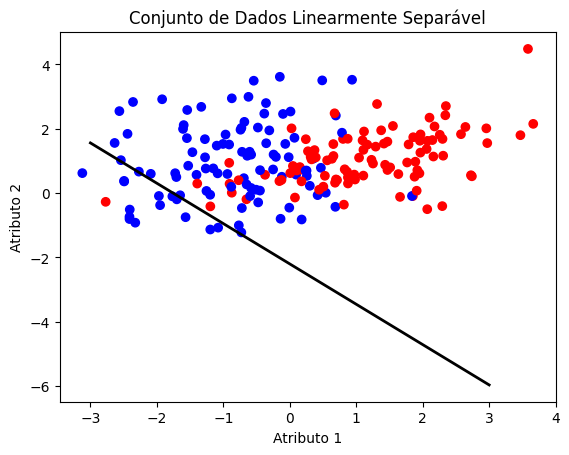

Acurácia do Perceptron: 0.425
Acurácia do MLPClassifier: 0.725


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Conjunto de dados linearmente separável
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento e previsão do Perceptron
perceptron = Perceptron(eta=0.1, n_iter=1000)
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)

# Treinamento e previsão do MLPClassifier
mlp = MLPClassifier(hidden_units=10, learning_rate=0.1, n_epochs=10000)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Plot dos dados e da separação das classes pelo Perceptron
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title('Conjunto de Dados Linearmente Separável')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')

# Plot da reta de separação pelo Perceptron
w = perceptron.w_
x_plot = np.linspace(-3, 3, 100)
y_plot = (-w[0] - w[1] * x_plot) / w[2]
plt.plot(x_plot, y_plot, color='black', linestyle='-', linewidth=2)

plt.show()

# Imprimir a acurácia dos classificadores
print('Acurácia do Perceptron:', accuracy_perceptron)
print('Acurácia do MLPClassifier:', accuracy_mlp)

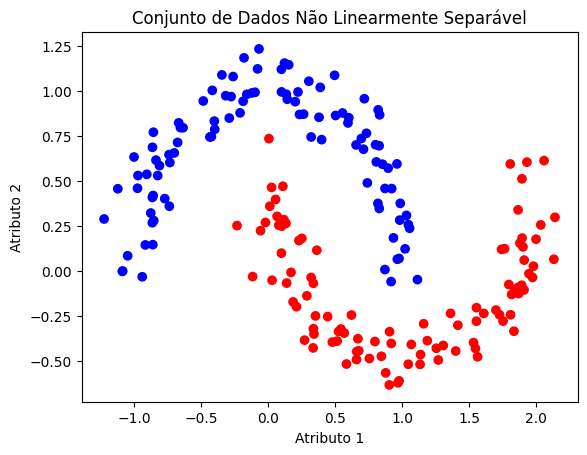

Acurácia do Perceptron: 0.45
Acurácia do MLPClassifier: 0.975


In [ ]:
from sklearn.datasets import make_moons

# Conjunto de dados não linearmente separável
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento e previsão do Perceptron
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)

# Treinamento e previsão do MLPClassifier
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Plot dos dados e da separação das classes pelo Perceptron
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title('Conjunto de Dados Não Linearmente Separável')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')

plt.show()

# Imprimir a acurácia dos classificadores
print('Acurácia do Perceptron:', accuracy_perceptron)
print('Acurácia do MLPClassifier:', accuracy_mlp)